In [5]:
# Import the dependencies and API key.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-70.25073694385203, 171.1285051708242),
 (-37.63708692558308, -19.597023160432258),
 (-5.758824466446043, 171.83634405131983),
 (-67.40630996994199, 74.1145717665521),
 (-0.11453373185945281, -72.81121196456236),
 (-20.055426024620573, 138.71479745058537),
 (-28.167996434622125, 168.8331938233331),
 (-44.318352285478134, 32.13800016113041),
 (73.66814826177728, -129.4671305528953),
 (-56.47058619745508, 37.88827958112208),
 (-38.019746484211, 44.98033274985866),
 (13.107898966437745, -120.43514577942676),
 (-79.58062492952202, -143.42403940253672),
 (35.192765388077305, 21.8622021520508),
 (-88.4849619544472, 70.90413785722768),
 (-74.6786533738248, 52.15762383793967),
 (50.89235507691649, 96.15537679786456),
 (57.80729605057593, -134.32644155925794),
 (13.620177628418787, 96.37250235766737),
 (38.30256468894646, -57.06107988587044),
 (-56.48980036863116, -138.4836653693941),
 (-0.48708581351654345, -152.1467209311584),
 (-18.687794851048395, -80.70057114137178),
 (58.1981018053242, 

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [9]:
# Build basic URL for requests
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | lolua
City not found. Skipping...
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | miraflores
Processing Record 6 of Set 1 | mount isa
Processing Record 7 of Set 1 | vao
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | koroni
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | saryg-sep
Processing Record 17 of Set 1 | juneau
Processing Record 18 of Set 1 | dawei
Processing Record 19 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 20 of Set 1 | rikitea
Processi

Processing Record 36 of Set 4 | kapit
Processing Record 37 of Set 4 | alice springs
Processing Record 38 of Set 4 | takoradi
Processing Record 39 of Set 4 | upernavik
Processing Record 40 of Set 4 | baykit
Processing Record 41 of Set 4 | makokou
Processing Record 42 of Set 4 | la rioja
Processing Record 43 of Set 4 | kaitangata
Processing Record 44 of Set 4 | norman wells
Processing Record 45 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 46 of Set 4 | chapleau
Processing Record 47 of Set 4 | kununurra
Processing Record 48 of Set 4 | aklavik
Processing Record 49 of Set 4 | omsukchan
Processing Record 50 of Set 4 | tunduru
City not found. Skipping...
Processing Record 1 of Set 5 | moose factory
Processing Record 2 of Set 5 | ilulissat
Processing Record 3 of Set 5 | tomatlan
Processing Record 4 of Set 5 | utiroa
City not found. Skipping...
Processing Record 5 of Set 5 | punta arenas
Processing Record 6 of Set 5 | grand gaube
Processing Record 7 of Set 5 | scarboroug

Processing Record 25 of Set 8 | emerald
Processing Record 26 of Set 8 | dasoguz
Processing Record 27 of Set 8 | komatsu
Processing Record 28 of Set 8 | lata
Processing Record 29 of Set 8 | luganville
Processing Record 30 of Set 8 | barra patuca
Processing Record 31 of Set 8 | sabzevar
Processing Record 32 of Set 8 | pamplona
Processing Record 33 of Set 8 | batouri
Processing Record 34 of Set 8 | kavaratti
Processing Record 35 of Set 8 | geraldton
Processing Record 36 of Set 8 | komsomolskiy
Processing Record 37 of Set 8 | blythe
Processing Record 38 of Set 8 | letterkenny
Processing Record 39 of Set 8 | pisco
Processing Record 40 of Set 8 | bose
Processing Record 41 of Set 8 | manokwari
Processing Record 42 of Set 8 | katsuura
Processing Record 43 of Set 8 | belaya gora
Processing Record 44 of Set 8 | batemans bay
Processing Record 45 of Set 8 | bilibino
Processing Record 46 of Set 8 | agnibilekrou
Processing Record 47 of Set 8 | port hardy
Processing Record 48 of Set 8 | kollumerland


Processing Record 15 of Set 12 | nabire
Processing Record 16 of Set 12 | vostok
Processing Record 17 of Set 12 | belmonte
Processing Record 18 of Set 12 | great yarmouth
Processing Record 19 of Set 12 | sokoni
Processing Record 20 of Set 12 | buraydah
Processing Record 21 of Set 12 | jacaleapa
Processing Record 22 of Set 12 | shimoda
Processing Record 23 of Set 12 | katobu
Processing Record 24 of Set 12 | saucillo
Processing Record 25 of Set 12 | concarneau
Processing Record 26 of Set 12 | kalianget
Processing Record 27 of Set 12 | shrewsbury
Processing Record 28 of Set 12 | koundara
Processing Record 29 of Set 12 | winnemucca
Processing Record 30 of Set 12 | batagay-alyta
Processing Record 31 of Set 12 | bitkine
Processing Record 32 of Set 12 | lhokseumawe
Processing Record 33 of Set 12 | veraval
Processing Record 34 of Set 12 | grand centre
City not found. Skipping...
Processing Record 35 of Set 12 | harlingen
Processing Record 36 of Set 12 | hovd
Processing Record 37 of Set 12 | hol

In [13]:
city_data[0]

{'City': 'Bluff',
 'Lat': -46.6,
 'Lng': 168.3333,
 'Max Temp': 55,
 'Humidity': 86,
 'Cloudiness': 83,
 'Wind Speed': 14,
 'Country': 'NZ',
 'Date': '2021-04-18 16:01:25'}

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,55.00,86,83,14.00,NZ,2021-04-18 16:01:25
1,Jamestown,42.0970,-79.2353,55.00,50,75,5.75,US,2021-04-18 16:04:34
2,Saint-Philippe,-21.3585,55.7679,77.00,69,90,11.50,RE,2021-04-18 16:04:35
3,Miraflores,19.2167,-98.8083,71.60,28,1,5.75,MX,2021-04-18 16:04:36
4,Mount Isa,-20.7333,139.5000,69.80,23,0,12.66,AU,2021-04-18 16:04:37
5,Vao,-22.6667,167.4833,76.15,80,80,16.26,NC,2021-04-18 16:04:38
6,Port Alfred,-33.5906,26.8910,73.74,63,0,7.18,ZA,2021-04-18 16:04:38
7,Tuktoyaktuk,69.4541,-133.0374,14.00,92,20,4.61,CA,2021-04-18 16:04:39
8,Cabo San Lucas,22.8909,-109.9124,79.00,46,1,3.44,MX,2021-04-18 16:04:40
9,Mataura,-46.1927,168.8643,55.00,86,85,14.00,NZ,2021-04-18 16:01:24


In [12]:
# Reorder columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2021-04-18 16:01:25,-46.6000,168.3333,55.0,86,83,14.00
1,Jamestown,US,2021-04-18 16:04:34,42.0970,-79.2353,55.0,50,75,5.75
2,Saint-Philippe,RE,2021-04-18 16:04:35,-21.3585,55.7679,77.0,69,90,11.50
3,Miraflores,MX,2021-04-18 16:04:36,19.2167,-98.8083,71.6,28,1,5.75
4,Mount Isa,AU,2021-04-18 16:04:37,-20.7333,139.5000,69.8,23,0,12.66


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

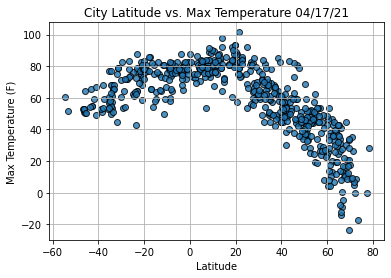

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

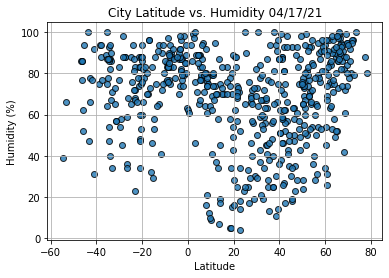

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

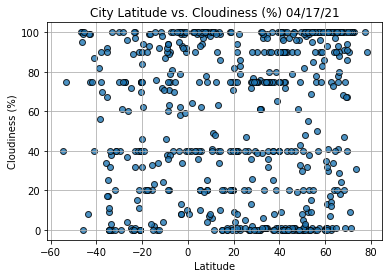

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

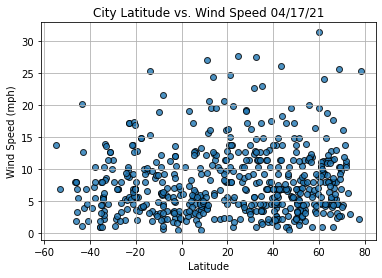

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [56]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + " , r = " + str(round(r_value))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [57]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

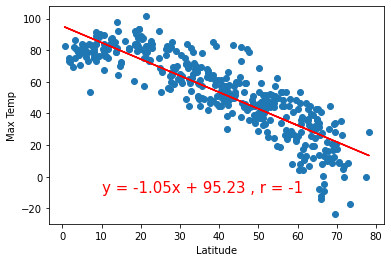

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-10))

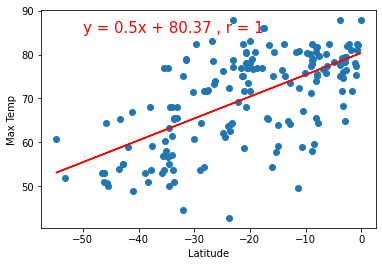

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,85))

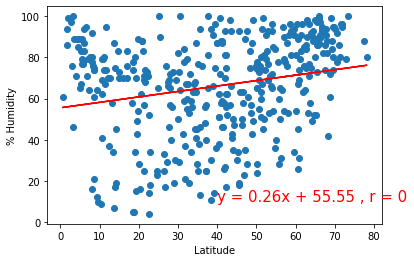

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

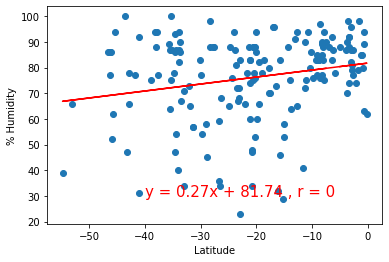

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-40,30))

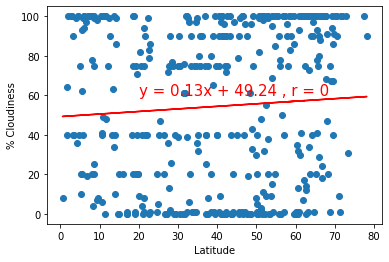

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(20,60))

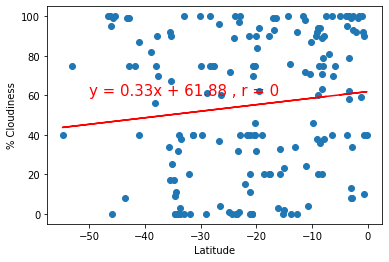

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

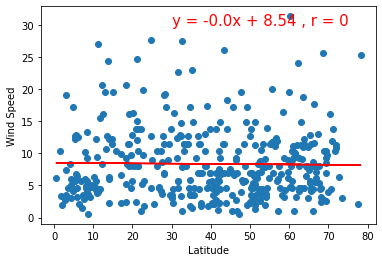

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(30,30))

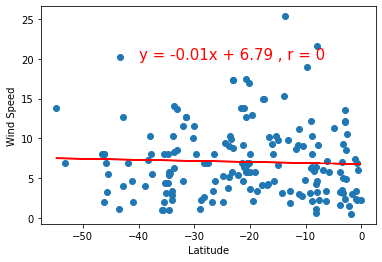

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-40,20))

In [2]:
import gmaps
from config import g_key